# Homework Assignment 2
## Author: Dat Tri Tat
## ID: 015660840
## Date: 10/28/2024





# Q 1a



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Seed for reproducibility
np.random.seed(0)

# Part A: Generate random data points
x = np.linspace(-4, 4, 30)  # 30 points from -4 to +4
f_x = x**3 + 6*x**2 - 3*x - 10  # Function f(x)
noise = np.random.uniform(-2, 2, size=x.shape)  # Random noise between -2 and +2
y = f_x + noise  # Noisy data

# Q 1b



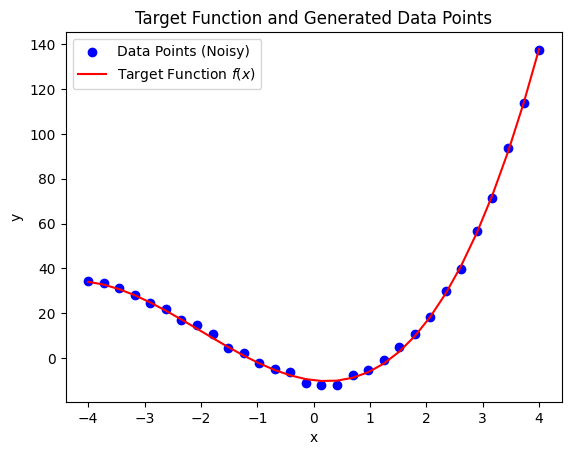

In [ ]:
# Part B: Plot the target function f(x) and the data points
plt.scatter(x, y, color='blue', label='Data Points (Noisy)')
plt.plot(x, f_x, color='red', label='Target Function $f(x)$')
plt.title("Target Function and Generated Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Q 1c


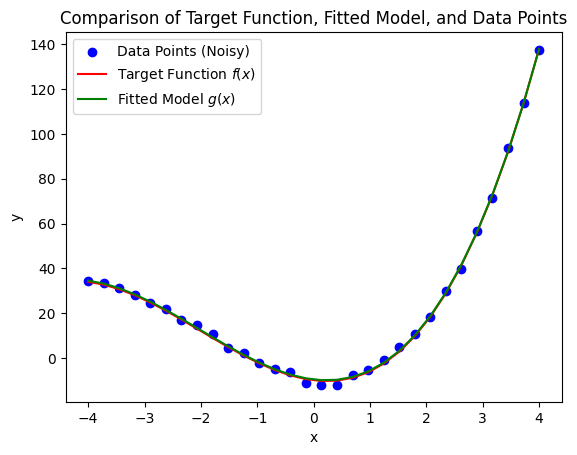

In [ ]:
# Part C: Fit a regression model to the data using a 3rd degree polynomial
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
# Plotting the target function, fitted model, and data points
plt.scatter(x, y, color='blue', label='Data Points (Noisy)')
plt.plot(x, f_x, color='red', label='Target Function $f(x)$')
plt.plot(x, y_pred, color='green', label='Fitted Model $g(x)$')
plt.title("Comparison of Target Function, Fitted Model, and Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Q 1d


Refitting the data with a third-degree polynomial to produce g′(x) gives the same result as g(x). Both models use the same data set and polynomial degree, resulting in identical coefficients. Their plots overlap when displayed with the objective function f(x) and the raw data. g(x) and g′(x) approximate f(x) but do not match exactly due to noise in the data. This shows that fitting the same model to the same data will yield the same result

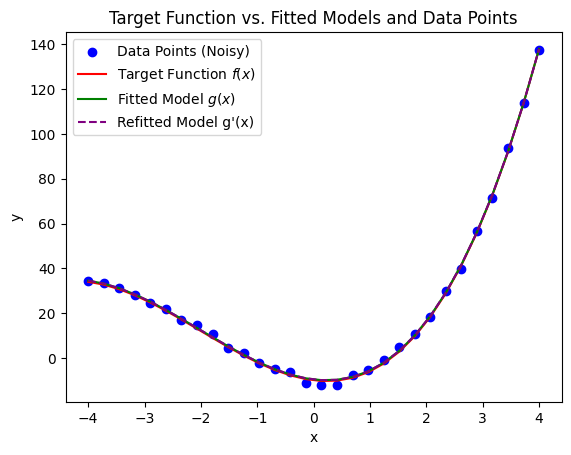

In [ ]:
# Part D: Transform the data again with a 3rd degree polynomial and refit to generate g'
poly_features_d = PolynomialFeatures(degree=3)
x_poly_d = poly_features_d.fit_transform(x.reshape(-1, 1))
model_d = LinearRegression()
model_d.fit(x_poly_d, y)
y_pred_prime = model_d.predict(x_poly_d)  # Generate predictions

# Plotting g, g', f(x), and the raw data
plt.scatter(x, y, color='blue', label='Data Points (Noisy)')
plt.plot(x, f_x, color='red', label='Target Function $f(x)$')
plt.plot(x, y_pred, color='green', label='Fitted Model $g(x)$')
plt.plot(x, y_pred_prime, color='purple', linestyle='--', label='Refitted Model g\'(x)')
plt.title("Target Function vs. Fitted Models and Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#Q 2a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/"

Mounted at /content/drive
 01_Crash_Course_and_Variables.ipynb	  hw1_5.ipynb			  testData.npy
 02_Lists_For_Loops_and_Ifs.ipynb	  hw1_6.ipynb			  trainData.npy
 03_Numpy.ipynb				  HW1_Tat_015660840.ipynb	  ZipAlpha.test
 04_IntroPandas_and_Charts.ipynb	  hw2_DatTriTat_015660840.ipynb   ZipAlpha.train
 Activite_4_DatTriTat.ipynb		 'Linear_Regression (1).ipynb'	  ZipDigits.test
 Automobile_data.csv			  Linear_Regression.ipynb	  ZipDigits.train
'Copy of hw2_DatTriTat_015660840.ipynb'   Salary_Information.csv


In [ ]:
def load_data(file_path):
    return np.loadtxt(file_path, delimiter=',', skiprows=1)

def filtered_data(data):
    # Filter the data to include only entries labeled 'C' or 'E'
    data = data[(data[:, 0] == 2) | (data[:, 0] == 4)]
    data[:, 0] = np.where(data[:, 0] == 2, 1, -1)
    return data

def extract_features(data):
    images = data[:, 1:]
    dimension = int(np.sqrt(images.shape[1]))
    images_reshaped = images.reshape(-1, dimension, dimension)
    middle_row = images_reshaped[:, dimension // 2, :]
    intensity = np.mean(middle_row, axis=1)
    flipped_images = np.flip(images_reshaped, axis=2)
    symmetry = np.mean(np.abs(images_reshaped - flipped_images), axis=(1, 2))
    # Combine features into a single array
    return np.vstack((intensity, symmetry)).T

def visualize_random_image(data):
    # Randomly select an image from the dataset
    random_index = np.random.choice(data.shape[0])
    images = data[:, 1:]
    dimension = int(np.sqrt(images.shape[1]))
    images = images.reshape(-1, dimension, dimension)
    plt.imshow(images[random_index]  , cmap='Greys_r')
    plt.axis('off')
    plt.show()

In [ ]:
def perceptron_learning_algorithm(x, y, max_iter=1000):
    # Initialize weights to zeros
    weight = np.zeros(x.shape[1])
    # PLA loop
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(x)):
            if np.sign(np.dot(weight, x[i])) != y[i]:
                # Update rule for misclassified point
                weight += y[i] * x[i]
                misclassified = True
        if not misclassified:
            break
    return weight

In [ ]:
def plot_data_and_hypothesis(features, labels, weights, title):
    # Extract features (excluding bias term)
    x = features[:, 1]  # Intensity
    y = features[:, 2]  # Symmetry

    # Plot data points
    plt.scatter(x[labels == 1], y[labels == 1], color='blue', label='Class 1')
    plt.scatter(x[labels == -1], y[labels == -1], color='red', label='Class -1')

    # Calculate decision boundary points within the zoomed-in range of data points
    x_values = np.linspace(min(features[:, 1]), max(features[:, 1]), 100)
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]

    # Plot decision boundary
    plt.plot(x_values, y_values, 'k-', label='Decision Boundary', linewidth=2)  # Solid line for better visibility

    # Set labels and plot settings
    plt.xlabel('Intensity')
    plt.ylabel('Symmetry')
    plt.title(title)
    plt.legend()
    plt.show()

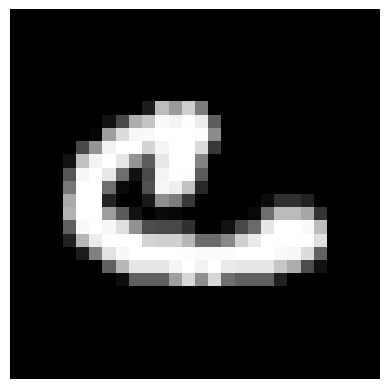

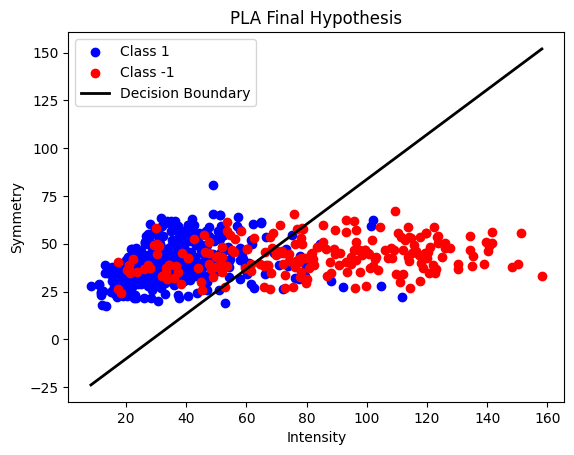

In [ ]:
#task A
train_data = load_data("/content/drive/MyDrive/Colab Notebooks/ZipAlpha.train")
train_data = filtered_data(train_data)
train_features = extract_features(train_data)
train_labels = train_data[:, 0]
train_features = np.c_[np.ones(len(train_features)), train_features]  # Adding bias term to features
visualize_random_image(train_data)
final_weights = perceptron_learning_algorithm(train_features, train_labels)
plot_data_and_hypothesis(train_features, train_labels, final_weights, title="PLA Final Hypothesis")

#Q 2b

In [ ]:
# Task B: Implement and Plot Pocket Algorithm
def pocket_algorithm(x, y, max_iter=1000):
    # Initialize weights to zeros and set initial best weights and error
    weight = np.zeros(x.shape[1])
    best_weight = np.copy(weight)
    best_error = np.sum(np.sign(np.dot(x, weight)) != y)

    # Pocket Algorithm loop
    for _ in range(max_iter):
        for i in range(len(x)):
            if np.sign(np.dot(weight, x[i])) != y[i]:
                weight += y[i] * x[i]
                current_error = np.sum(np.sign(np.dot(x, weight)) != y)
                if current_error < best_error:
                    best_weight = np.copy(weight)
                    best_error = current_error
    return best_weight


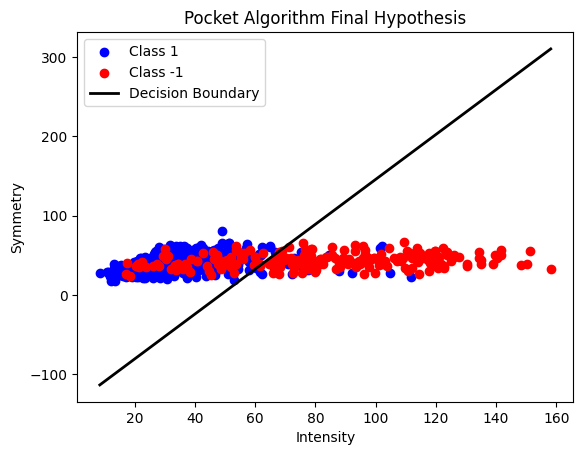

In [ ]:
#Task B
weights_pocket = pocket_algorithm(train_features, train_labels)
plot_data_and_hypothesis(train_features, train_labels, weights_pocket,  title='Pocket Algorithm Final Hypothesis')

#Q 2c

In [ ]:
def plot_decision_boundary(X_raw, y, model_weights, poly):
    x_min, x_max = X_raw[:, 1].min() - 1, X_raw[:, 1].max() + 1
    y_min, y_max = X_raw[:, 2].min() - 1, X_raw[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    poly_grid = poly.transform(grid)

    # Predict each point in the grid
    Z = np.sign(np.dot(poly_grid, model_weights))
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.4)
    plt.scatter(X_raw[:, 1], X_raw[:, 2], c=y, cmap=plt.cm.bwr)
    plt.xlabel('Intensity')
    plt.ylabel('Symmetry')
    plt.title("Decision Boundary (using Polynomial Features)")
    plt.show()

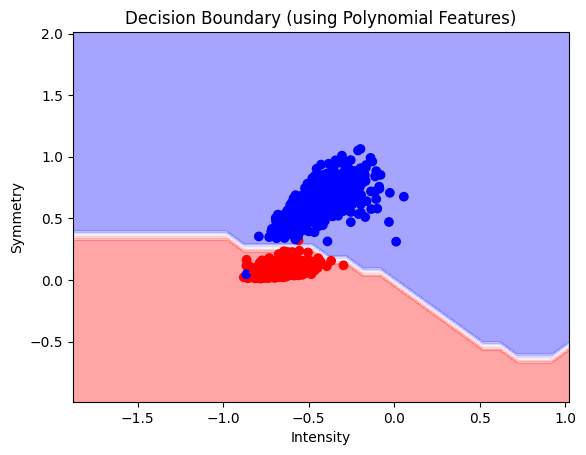

Test error: 2.12%


In [ ]:
# Task C: Polynomial transformation and pocket algorithm

test_digits_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.test")
train_digits_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ZipDigits.train")

def filtered_data(data):
    # Keep only digits '1' and '5'
    data = data[(data[:, 0] == 1) | (data[:, 0] == 5)]
    # Relabel: '1' -> 1, '5' -> -1
    data[:, 0] = np.where(data[:, 0] == 1, 1, -1)
    return data

def extract_features(data):
    images = data[:, 1:]
    intensity = np.mean(images, axis=1)
    dimension = int(np.sqrt(images.shape[1]))
    images_reshaped = images.reshape(-1, dimension, dimension)
    flipped_images = np.flip(images_reshaped, axis=1)
    symmetry = np.mean(np.abs(images_reshaped - flipped_images), axis=(1, 2))
    return np.vstack((intensity, symmetry)).T

train_digits_data = filtered_data(train_digits_data)
test_digits_data = filtered_data(test_digits_data)

train_digits_labels = train_digits_data[:, 0]
test_digits_labels = test_digits_data[:, 0]

# Extract features
train_digits_features = extract_features(train_digits_data)
test_digits_features = extract_features(test_digits_data)

# Add bias term to features
train_digits_features = np.c_[np.ones(len(train_digits_features)), train_digits_features]
test_digits_features = np.c_[np.ones(len(test_digits_features)), test_digits_features]

# Polynomial transformation
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_train_features = poly.fit_transform(train_digits_features[:,1:])
poly_test_features = poly.transform(test_digits_features[:,1:])

weights_pocket_poly = pocket_algorithm(poly_train_features, train_digits_labels)

# Plot the decision boundary
plot_decision_boundary(train_digits_features, train_digits_labels, weights_pocket_poly, poly)

# Test set predictions and error calculation
test_predictions = np.sign(np.dot(poly_test_features, weights_pocket_poly))
test_error = np.mean(test_predictions != test_digits_labels)

# Output test error
print(f"Test error: {test_error * 100:.2f}%")


#Q 3a

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, random_state=10, hypercube=False, class_sep=7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Q 3b

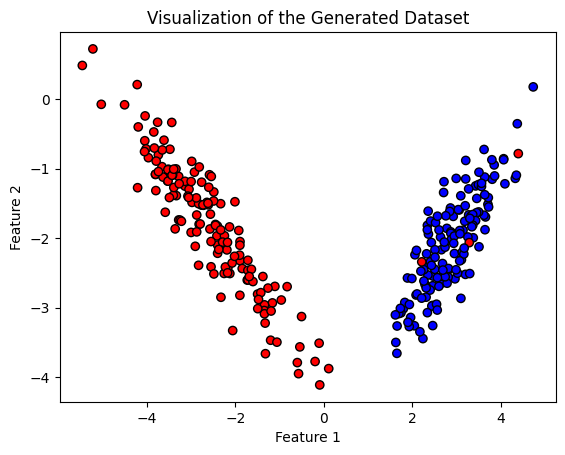

In [ ]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.bwr, edgecolors='k')
plt.title("Visualization of the Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Q 3c


In [ ]:
# Step C: Implement Gradient Descent
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr, iterations):
    weights = np.zeros(X.shape[1])
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        errors = y - predictions
        gradient = np.dot(X.T, errors) / len(y)
        weights += lr * gradient
    return weights

def predict(X, weights):
    z = np.dot(X, weights)
    probabilities = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in probabilities]

# Use 80% of data for training
weights = logistic_regression(X_train, y_train, lr=0.5, iterations=4000)
print("Weight:", weights)

Weight: [ 3.77870076 -2.13903632  0.6582514 ]


# Q 3d
The logistic model worked very well on the out-of-sample data, achieving an accuracy of 100%.

I created a synthetic dataset with two features, added an intercept term, and split it into 80% training and 20% testing sets. Using gradient descent over 4,000 iterations, I trained a logistic regression model to learn the weights. I then evaluated the model by comparing its predictions on the test set with the actual classes.

Metric: I used accuracy to evaluate the model's performance by measuring the proportion of correct predictions.


Accuracy on test data: 100.00


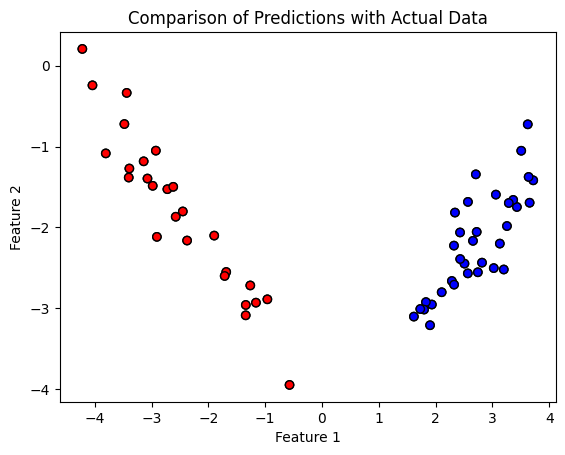

In [ ]:
# Step D: Evaluate the Model
y_pred = predict(X_test, weights)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}")

# Scatter plot for actual classes
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap=plt.cm.bwr, edgecolors='k')
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred, cmap=plt.cm.bwr, edgecolors='k')

plt.title("Comparison of Predictions with Actual Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights))
    Z = np.array([1 if i > 0.5 else 0 for i in Z]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title('Decision Boundary and Data Points')
    plt.show()


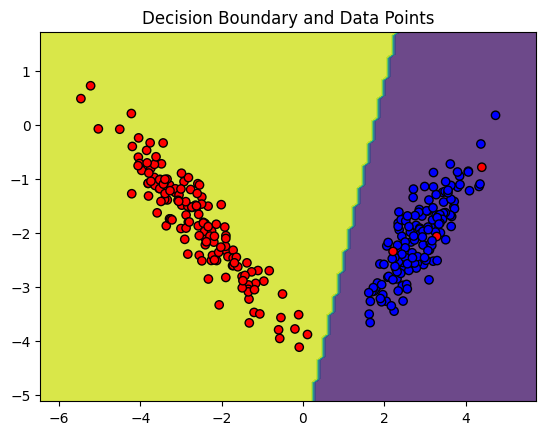

In [ ]:
plot_decision_boundary(X_bias, y, weights)